# Assignment - 5
Donal Loitam 
AI21BTECH11009

# Question 1

In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

### Q1(a)Develop a small code snippet to load the corresponding Gym environment(s) and print out the respective state and action space. Develop a random agent to understand the reward function of the environment. Record your observations.

In [3]:
env = gym.make("MountainCarContinuous-v0")
print("Environment:", env.unwrapped.spec.id)
print("State Space:", env.observation_space)
print("Action Space:", env.action_space)
print("Action Space Low:", env.action_space.low)
print("Action Space High:", env.action_space.high)
print("\n--------------------------------------------------- ")

num_episodes = 5
print(f"Running Random Agent in MountainCarContinuous Environment for {num_episodes} episodes: \n ")

for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    n_steps = 0
    done = False

    while not done:
        action = env.action_space.sample()
        next_state, reward, terminated, truncated, _ = env.step(action)
        
        total_reward += reward
        state = next_state
        n_steps += 1
        if n_steps <= 5:
            print(f"Step {n_steps}, Reward: {reward}, Action taken: {action}")
        
        done = terminated or truncated
        env.render()

        if done:
            print(f"\nEpisode {episode + 1}, Total Reward: {total_reward}, Total steps: {n_steps}\n")
            break


Environment: MountainCarContinuous-v0
State Space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action Space: Box(-1.0, 1.0, (1,), float32)
Action Space Low: [-1.]
Action Space High: [1.]

--------------------------------------------------- 
Running Random Agent in MountainCarContinuous Environment for 5 episodes: 
 
Step 1, Reward: -0.026973623967252537, Action taken: [0.5193614]
Step 2, Reward: -0.001675651377951315, Action taken: [-0.12944695]
Step 3, Reward: -0.039542194124496534, Action taken: [0.62882584]
Step 4, Reward: -0.035431597580179996, Action taken: [0.59524447]
Step 5, Reward: -0.005736218483506051, Action taken: [0.23950404]

Episode 1, Total Reward: -32.387953638715544, Total steps: 999

Step 1, Reward: -0.00019591015090247854, Action taken: [0.04426174]
Step 2, Reward: -0.027516698151717735, Action taken: [-0.5245636]
Step 3, Reward: -0.026264585177461088, Action taken: [-0.51248986]
Step 4, Reward: -0.007916303055077734, Action taken: [0.28135926]
Step 5, Reward: -

In [4]:
env = gym.make("LunarLanderContinuous-v2", render_mode="rgb_array")
print("Environment:", env.unwrapped.spec.id)
print("State Space:", env.observation_space)
print("Action Space:", env.action_space)
print("Action Space Low:", env.action_space.low)
print("Action Space High:", env.action_space.high)
print("\n--------------------------------------------------- ")

num_episodes = 5
print(f"Running Random Agent in MountainCarContinuous Environment for {num_episodes} episodes: \n ")

for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    n_steps = 0
    done = False

    while not done:
        action = env.action_space.sample()
        next_state, reward, terminated, truncated, _ = env.step(action)
        
        total_reward += reward
        state = next_state
        n_steps += 1
        if n_steps <= 5:
            print(f"Step {n_steps}, Reward: {reward}, Action taken: {action}")
        
        done = terminated or truncated
        env.render()

        if done:
            print(f"\nEpisode {episode + 1}, Total Reward: {total_reward}, Total steps: {n_steps}\n")
            break


Environment: LunarLanderContinuous-v2
State Space: Box([-90.        -90.         -5.         -5.         -3.1415927  -5.
  -0.         -0.       ], [90.        90.         5.         5.         3.1415927  5.
  1.         1.       ], (8,), float32)
Action Space: Box(-1.0, 1.0, (2,), float32)
Action Space Low: [-1. -1.]
Action Space High: [1. 1.]

--------------------------------------------------- 
Running Random Agent in MountainCarContinuous Environment for 5 episodes: 
 
Step 1, Reward: -0.6396413889546352, Action taken: [ 0.9801321  -0.12182225]
Step 2, Reward: 0.1511180021294365, Action taken: [-0.7604459   0.48383346]
Step 3, Reward: -1.4298566165706177, Action taken: [0.3086939  0.11227129]
Step 4, Reward: 0.8749233369978537, Action taken: [-0.48937684 -0.70876724]
Step 5, Reward: -0.5892097361380525, Action taken: [-0.56780726  0.89028007]

Episode 1, Total Reward: -317.1298823398124, Total steps: 124

Step 1, Reward: -1.3119156837172454, Action taken: [-0.58687955  0.2562045 ]


In [2]:
import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np

In [3]:
class Actor(nn.Module):
    def __init__(self, actor_lr, state_dim, fc1_size, fc2_size, n_actions):
        super(Actor, self).__init__()
        self.state_dim = state_dim
        self.n_actions = n_actions
        self.fc1_size = fc1_size
        self.fc2_size = fc2_size
        
        self.fc1 = nn.Linear(*state_dim, fc1_size)
        dim_in_1 = self.fc1.weight.data.size()[0]
        f1 = 1. / np.sqrt(dim_in_1)
        torch.nn.init.uniform_(self.fc1.weight.data, -f1, f1)
        torch.nn.init.uniform_(self.fc1.bias.data, -f1, f1)
        self.batch_norm1 = nn.LayerNorm(self.fc1_size)
      
        self.fc2 = nn.Linear(fc1_size, fc2_size)  
        dim_in_2 = self.fc2.weight.data.size()[0]
        f2 = 1. / np.sqrt(dim_in_2)
        torch.nn.init.uniform_(self.fc2.weight.data, -f2, f2)
        torch.nn.init.uniform_(self.fc2.bias.data, -f2, f2)
        self.batch_norm2 = nn.LayerNorm(self.fc2_size)       

        f3 = 0.003
        self.fc3 = nn.Linear(fc2_size, n_actions)
        torch.nn.init.uniform_(self.fc3.weight.data, -f3, f3)
        torch.nn.init.uniform_(self.fc3.bias.data, -f3, f3)        
#         self.fc3.weight.data.uniform_(-f3, f3)
#         self.fc3.bias.data.uniform_(-f3, f3)

        self.optimizer = optim.Adam(self.parameters(), lr=actor_lr)
        self.device = torch.device('cuda:0' if torch.cuda.is_available() else 'cuda:1')
        self.to(self.device)

        
    def forward(self, state):
        x = self.batch_norm1(self.fc1(state))
        x = F.relu(x)
        x = self.batch_norm2(self.fc2(x))
        x = F.relu(x)
        
        return torch.tanh(self.fc3(x))  # tanh activation for bounded actions[-1, +1], later may need to multiply according to environment action bounds 

    
    
class Critic(nn.Module):
    def __init__(self, critic_lr, state_dim, fc1_size, fc2_size, n_actions):
        super(Critic, self).__init__()
        self.state_dim = state_dim
        self.n_actions = n_actions
        self.fc1_size = fc1_size
        self.fc2_size = fc2_size
        
        self.fc1 = nn.Linear(*state_dim, fc1_size)
        dim_in_1 = self.fc1.weight.data.size()[0]
        f1 = 1. / np.sqrt(dim_in_1)
        torch.nn.init.uniform_(self.fc1.weight.data, -f1, f1)
        torch.nn.init.uniform_(self.fc1.bias.data, -f1, f1)
        self.batch_norm1 = nn.LayerNorm(self.fc1_size)
      
        self.fc2 = nn.Linear(fc1_size, fc2_size)
        dim_in_2 = self.fc2.weight.data.size()[0]
        f2 = 1. / np.sqrt(dim_in_2)
        torch.nn.init.uniform_(self.fc2.weight.data, -f2, f2)
        torch.nn.init.uniform_(self.fc2.bias.data, -f2, f2)
        self.batch_norm2 = nn.LayerNorm(self.fc2_size)       
        self.action_val = nn.Linear(self.n_actions, fc2_size)
        
        f3 = 0.003                                 # From the paper of DDPG
        self.fc3 = nn.Linear(fc2_size, 1)
        torch.nn.init.uniform_(self.fc3.weight.data, -f3, f3)
        torch.nn.init.uniform_(self.fc3.bias.data, -f3, f3)        

        self.optimizer = optim.Adam(self.parameters(), lr=critic_lr)
        self.device = torch.device('cuda:0' if torch.cuda.is_available() else 'cuda:1')
        self.to(self.device)

        
    def forward(self, state, action):
        x = self.batch_norm1(self.fc1(state))  # x = state value,
        x = F.relu(x)                         #  use batch_norm before relu
        x = self.batch_norm2(self.fc2(x))
        
        action_value = self.action_val(action)
        state_action_value = F.relu(torch.add(x, action_value))
    
        return self.fc3(state_action_value)
     
    
class OUActionNoiseTorch:
    def __init__(self, mu, sigma=0.15, theta=0.2, dt=1e-2, x0=None):
        self.theta = theta
        self.mu = mu
        self.sigma = sigma
        self.dt = dt
        self.x0 = x0
        self.reset()

    def __call__(self):
        x = self.x_prev + self.theta * (self.mu - self.x_prev) * self.dt + \
            self.sigma * torch.sqrt(torch.tensor(self.dt)) * torch.randn_like(self.mu)
        self.x_prev = x

        return x

    def reset(self):
        self.x_prev = self.x0 if self.x0 is not None else torch.zeros_like(self.mu)
     
    
class GaussianActionNoiseTorch:
    def __init__(self, mu, sigma=0.15):
        self.mu = mu
        self.sigma = sigma

    def __call__(self):
        return torch.normal(mean=self.mu, std=self.sigma)

    def reset(self):   
        pass   # Gaussian noise is memoryless, no need to reset: each sample is independent of the previous samples

In [4]:
class DDPG_agent:
    def __init__(self, state_dim, tau, n_actions, max_mem_size=1000000, fc1_dims=400, fc2_dims=300, batch_size=64,
                 gamma=0.99, actor_lr=1e-4, critic_lr=1e-3, ouaction_noise =True):
        
        self.critic_lr = critic_lr
        self.actor_lr = actor_lr
        self.tau = tau
        self.n_actions = n_actions
        
        self.actor = Actor(actor_lr, state_dim, fc1_dims, fc2_dims,
                                n_actions=n_actions)
        self.actor_target = Actor(actor_lr, state_dim, fc1_dims, fc2_dims,
                                n_actions=n_actions)

        self.critic = Critic(critic_lr, state_dim, fc1_dims, fc2_dims,
                                n_actions=n_actions)        
        self.critic_target = Critic(critic_lr, state_dim, fc1_dims, fc2_dims,
                                n_actions=n_actions)

        if ouaction_noise == True:
            self.noise = OUActionNoiseTorch(mu=torch.zeros(n_actions))
            
        else:
            self.noise = GaussianActionNoiseTorch(mu=torch.zeros(n_actions), sigma=0.15)

        self.batch_size = batch_size
        self.gamma = gamma
        self.update_target_network(tau=1)

        # Replay buffers
        self.mem_ctr = 0
        self.max_mem_size = max_mem_size
        self.state_memory = np.zeros((self.max_mem_size, *state_dim),dtype=np.float32)
        self.new_state_memory = np.zeros((self.max_mem_size, *state_dim), dtype=np.float32)
        self.action_memory = np.zeros((self.max_mem_size, n_actions), dtype=np.int64)
        self.reward_memory = np.zeros(self.max_mem_size, dtype=np.float32)
        self.terminal_memory = np.zeros(self.max_mem_size, dtype=bool)
        
       
    def store_experience(self, state, action, reward, new_state, terminated, truncated):
        mem_index = self.mem_ctr % self.max_mem_size     
        self.state_memory[mem_index] = state
        self.new_state_memory[mem_index] = new_state
        self.action_memory[mem_index] = action
        self.reward_memory[mem_index] = reward
        self.terminal_memory[mem_index] = terminated or truncated
        
        self.mem_ctr += 1
        
     
    def select_action(self, state):
        self.actor.eval()      # set the actor network to eval mode
        
        state_tensor = torch.tensor([state], dtype=torch.float).to(self.actor.device)
        action = self.actor.forward(state_tensor).to(self.actor.device)
#         noise_added_action = action + torch.tensor(self.noise(), dtype=torch.float).to(self.actor.device)
        noise_added_action = action + self.noise().to(self.actor.device)

        self.actor.train()   # set the actor network to train mode back
        return noise_added_action.cpu().detach().numpy()[0]

    
    def update(self):
        if self.mem_ctr < self.batch_size:
            return
        
        # Sample a batch of state, actions, rewards and next states from the replay buffer
        filled_mem_count = self.mem_ctr if self.mem_ctr < self.max_mem_size else self.max_mem_size
        batch_indices = np.random.choice(filled_mem_count, self.batch_size, replace=False)
        indices = np.arange(self.batch_size, dtype=np.int32)
        states = self.state_memory[batch_indices]
        actions = self.action_memory[batch_indices]
        rewards = self.reward_memory[batch_indices]
        new_states = self.new_state_memory[batch_indices]
        dones = self.terminal_memory[batch_indices]
        
        
        states = torch.tensor(states, dtype=torch.float).to(self.actor.device)
        new_states = torch.tensor(new_states, dtype=torch.float).to(self.actor.device)
        actions = torch.tensor(actions, dtype=torch.float).view(-1, self.n_actions).to(self.actor.device)
        rewards = torch.tensor(rewards, dtype=torch.float).to(self.actor.device)
        dones = torch.tensor(dones).to(self.actor.device)
     
        self.actor_target.eval()
        self.critic_target.eval()
        self.critic.eval()
        
        target_actions = self.actor_target.forward(new_states)
        critic_value_ = self.critic_target.forward(new_states, target_actions)
        
        critic_value = self.critic.forward(states, actions)
    
        target = []
        for j in range(self.batch_size):
            target.append(rewards[j] + self.gamma * critic_value_[j] * (1 - dones[j].float()))

        target = torch.tensor(target).to(self.critic.device)
        target = target.view(self.batch_size, 1)
        
        self.critic.train()
        self.critic.optimizer.zero_grad()
        critic_loss = F.mse_loss(target, critic_value)
        critic_loss.backward()
        self.critic.optimizer.step()
        
        self.critic.eval()
        
        self.actor.optimizer.zero_grad()
        mu = self.actor.forward(states)
        actor_loss = -self.critic.forward(states, mu)
        actor_loss = torch.mean(actor_loss)
        actor_loss.backward()
        self.actor.optimizer.step()

        self.update_target_network()
        

    def update_target_network(self, tau=None):     # used online resource for this
        if tau is None:
            tau = self.tau
        
        actor_params = self.actor.named_parameters()
        critic_params = self.critic.named_parameters()
        actor_target_params = self.actor_target.named_parameters()
        critic_target_params = self.critic_target.named_parameters()

        critic_state_dict = dict(critic_params)
        actor_state_dict = dict(actor_params)
        critic_target_state_dict = dict(critic_target_params)
        actor_target_state_dict = dict(actor_target_params)

        for name in critic_state_dict:
            critic_state_dict[name] = tau*critic_state_dict[name].clone() + \
                                (1-tau)*critic_target_state_dict[name].clone()
        self.critic_target.load_state_dict(critic_state_dict)
        
        for name in actor_state_dict:
             actor_state_dict[name] = tau*actor_state_dict[name].clone() + \
                                 (1-tau)*actor_target_state_dict[name].clone()
        self.actor_target.load_state_dict(actor_state_dict)

    

### Q1(b) Implement the DDPG algorithm to solve the tasks envisioned by the two environments.Provide corresponding learning graphs in your Jupyter notebooks

## Env 1: Mountain car continuous

In [94]:
env = gym.make("MountainCarContinuous-v0")
n_actions=env.action_space.shape[0]
state_dim=env.observation_space.shape
print(f"n_actions = {n_actions}")
print(f"state_dim = {state_dim}")
agent = DDPG_agent(state_dim=state_dim, tau=0.001, n_actions=n_actions, max_mem_size=1000000,
                    fc1_dims=400, fc2_dims=300, batch_size=64, gamma=0.99, actor_lr=0.0001,
                    critic_lr=0.001,ouaction_noise=True) 

np.random.seed(0)
n_episodes = 200
scores_ou_mc = []
avg_scores_ou_mc = []
for episode in range(n_episodes):
    done = False
    score = 0
    state, _ = env.reset()
    agent.noise.reset()
    while not done:
        action = agent.select_action(state)
        new_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        if done:                               # reward shaping needed in mountain car
            reward += 5
        agent.store_experience(state, action, reward, new_state, terminated, truncated)
        agent.update()
        score += reward
        
        state = new_state

    scores_ou_mc.append(score)
    avg_score = np.mean(scores_ou_mc[-50:])
    avg_scores_ou_mc.append(avg_score)
    print('Episode:', episode, ', score %.1f:' % score,
            ', 50-game average score %.1f:' % avg_score)


n_actions = 1
state_dim = (2,)
Episode: 0 , score -15.2: , 50-game average score -15.2:
Episode: 1 , score -9.5: , 50-game average score -12.4:
Episode: 2 , score -0.8: , 50-game average score -8.5:
Episode: 3 , score 2.1: , 50-game average score -5.8:
Episode: 4 , score 1.6: , 50-game average score -4.4:
Episode: 5 , score 3.2: , 50-game average score -3.1:
Episode: 6 , score -5.7: , 50-game average score -3.5:
Episode: 7 , score -1.9: , 50-game average score -3.3:
Episode: 8 , score -0.3: , 50-game average score -2.9:
Episode: 9 , score -24.2: , 50-game average score -5.1:
Episode: 10 , score -14.7: , 50-game average score -5.9:
Episode: 11 , score -10.0: , 50-game average score -6.3:
Episode: 12 , score -5.7: , 50-game average score -6.2:
Episode: 13 , score -18.0: , 50-game average score -7.1:
Episode: 14 , score -25.9: , 50-game average score -8.3:
Episode: 15 , score -3.9: , 50-game average score -8.1:
Episode: 16 , score 2.5: , 50-game average score -7.4:
Episode: 17 , score -10

Episode: 145 , score 92.8: , 50-game average score 98.3:
Episode: 146 , score 99.3: , 50-game average score 98.3:
Episode: 147 , score 96.9: , 50-game average score 98.3:
Episode: 148 , score 96.5: , 50-game average score 98.2:
Episode: 149 , score 96.7: , 50-game average score 98.2:
Episode: 150 , score 100.5: , 50-game average score 98.2:
Episode: 151 , score 100.5: , 50-game average score 98.2:
Episode: 152 , score 99.1: , 50-game average score 98.2:
Episode: 153 , score 96.8: , 50-game average score 98.1:
Episode: 154 , score 100.3: , 50-game average score 98.2:
Episode: 155 , score 99.3: , 50-game average score 98.2:
Episode: 156 , score 99.4: , 50-game average score 98.2:
Episode: 157 , score 97.7: , 50-game average score 98.2:
Episode: 158 , score 99.3: , 50-game average score 98.2:
Episode: 159 , score 99.3: , 50-game average score 98.2:
Episode: 160 , score 99.6: , 50-game average score 98.2:
Episode: 161 , score 100.0: , 50-game average score 98.2:
Episode: 162 , score 98.5: 

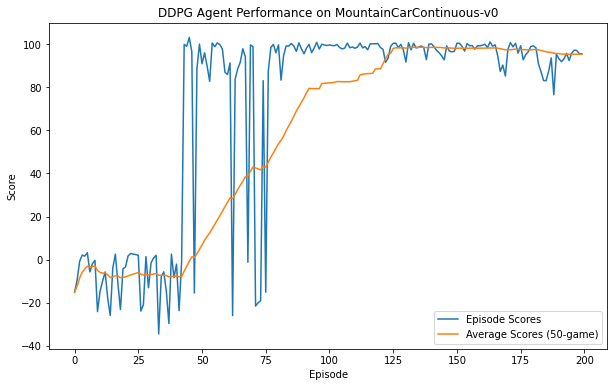

In [97]:
plt.figure(figsize=(10, 6))
plt.plot(scores_ou_mc, label='Episode Scores')
plt.plot(avg_scores_ou_mc, label='Average Scores (50-game)')
plt.xlabel('Episode')
plt.ylabel('Score')
plt.title('DDPG Agent Performance on MountainCarContinuous-v0')
plt.legend()
plt.show()

## Env 2: Lunar lander continuous

In [14]:
env = gym.make("LunarLanderContinuous-v2")
n_actions=env.action_space.shape[0]
state_dim=env.observation_space.shape
print(f"n_actions = {n_actions}")
print(f"state_dim = {state_dim}")
agent = DDPG_agent(state_dim=state_dim, tau=0.0005, n_actions=n_actions, max_mem_size=1000000,
                    fc1_dims=400, fc2_dims=300, batch_size=64, gamma=0.99, actor_lr=0.0001,
                    critic_lr=0.001,ouaction_noise=True) 

np.random.seed(0)
n_episodes = 500
done_reward = 100.0  # to encourage landing correctly

scores_ou_ll = []
avg_scores_ou_ll = []
for episode in range(n_episodes):
    done = False
    score = 0
    n_steps = 0
    state, _ = env.reset()
    agent.noise.reset()
    while not done:
        action = agent.select_action(state)
        new_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        reward += int(done) * done_reward     # when done
        agent.store_experience(state, action, reward, new_state, terminated, truncated)
        agent.update()
        score += reward
        n_steps += 1
        
        if n_steps > 100:
            done = True
        state = new_state

    scores_ou_ll.append(score)
    avg_score = np.mean(scores_ou_ll[-50:])
    avg_scores_ou_ll.append(avg_score)
    print('Episode:', episode, ', score %.1f:' % score,
            ', 50-game average score %.1f:' % avg_score)


n_actions = 2
state_dim = (8,)
Episode: 0 , score -37.9: , 50-game average score -37.9:
Episode: 1 , score -390.2: , 50-game average score -214.0:
Episode: 2 , score -572.8: , 50-game average score -333.6:
Episode: 3 , score -633.8: , 50-game average score -408.6:
Episode: 4 , score -463.9: , 50-game average score -419.7:
Episode: 5 , score -496.6: , 50-game average score -432.5:
Episode: 6 , score -690.0: , 50-game average score -469.3:
Episode: 7 , score -624.6: , 50-game average score -488.7:
Episode: 8 , score -728.7: , 50-game average score -515.4:
Episode: 9 , score -531.3: , 50-game average score -517.0:
Episode: 10 , score -409.4: , 50-game average score -507.2:
Episode: 11 , score -320.2: , 50-game average score -491.6:
Episode: 12 , score -526.6: , 50-game average score -494.3:
Episode: 13 , score -288.3: , 50-game average score -479.6:
Episode: 14 , score -83.2: , 50-game average score -453.1:
Episode: 15 , score -37.8: , 50-game average score -427.2:
Episode: 16 , score -23

Episode: 138 , score -116.9: , 50-game average score -91.5:
Episode: 139 , score -190.4: , 50-game average score -92.5:
Episode: 140 , score -188.1: , 50-game average score -95.9:
Episode: 141 , score -77.1: , 50-game average score -97.5:
Episode: 142 , score -1.9: , 50-game average score -100.1:
Episode: 143 , score -62.3: , 50-game average score -96.4:
Episode: 144 , score -30.2: , 50-game average score -92.7:
Episode: 145 , score -335.5: , 50-game average score -94.7:
Episode: 146 , score -3.7: , 50-game average score -90.6:
Episode: 147 , score -441.0: , 50-game average score -97.1:
Episode: 148 , score -465.1: , 50-game average score -106.2:
Episode: 149 , score -120.3: , 50-game average score -105.5:
Episode: 150 , score -38.6: , 50-game average score -105.5:
Episode: 151 , score -401.0: , 50-game average score -111.8:
Episode: 152 , score 32.1: , 50-game average score -107.2:
Episode: 153 , score 45.7: , 50-game average score -105.6:
Episode: 154 , score -244.9: , 50-game averag

Episode: 274 , score -301.1: , 50-game average score -157.0:
Episode: 275 , score -137.8: , 50-game average score -157.5:
Episode: 276 , score -47.9: , 50-game average score -155.9:
Episode: 277 , score -30.5: , 50-game average score -152.9:
Episode: 278 , score -123.7: , 50-game average score -154.9:
Episode: 279 , score -135.2: , 50-game average score -157.3:
Episode: 280 , score -158.8: , 50-game average score -158.8:
Episode: 281 , score -309.7: , 50-game average score -160.8:
Episode: 282 , score -367.0: , 50-game average score -159.2:
Episode: 283 , score -329.4: , 50-game average score -165.5:
Episode: 284 , score -55.4: , 50-game average score -158.3:
Episode: 285 , score -62.9: , 50-game average score -157.2:
Episode: 286 , score -304.7: , 50-game average score -158.3:
Episode: 287 , score -71.6: , 50-game average score -154.2:
Episode: 288 , score -156.3: , 50-game average score -153.3:
Episode: 289 , score -31.6: , 50-game average score -151.6:
Episode: 290 , score -206.9: ,

Episode: 412 , score -188.6: , 50-game average score -73.2:
Episode: 413 , score -59.4: , 50-game average score -75.4:
Episode: 414 , score -58.1: , 50-game average score -75.5:
Episode: 415 , score 1.6: , 50-game average score -75.0:
Episode: 416 , score -422.3: , 50-game average score -83.9:
Episode: 417 , score -26.0: , 50-game average score -83.9:
Episode: 418 , score -175.2: , 50-game average score -87.6:
Episode: 419 , score -186.2: , 50-game average score -89.3:
Episode: 420 , score -34.3: , 50-game average score -89.2:
Episode: 421 , score -47.6: , 50-game average score -89.8:
Episode: 422 , score 18.2: , 50-game average score -86.9:
Episode: 423 , score -5.1: , 50-game average score -86.5:
Episode: 424 , score -29.8: , 50-game average score -87.9:
Episode: 425 , score -184.1: , 50-game average score -91.6:
Episode: 426 , score -49.6: , 50-game average score -92.3:
Episode: 427 , score -111.7: , 50-game average score -94.8:
Episode: 428 , score 25.1: , 50-game average score -92

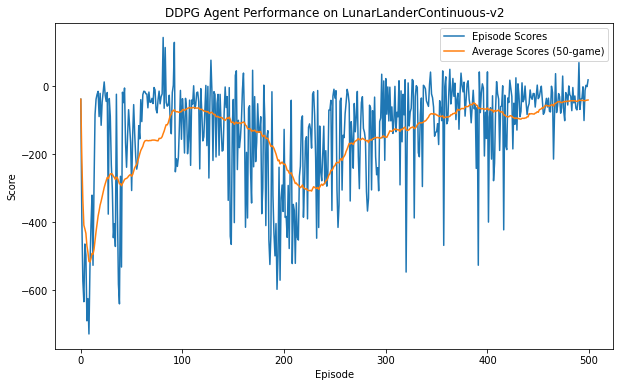

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(scores_ou_ll, label='Episode Scores')
plt.plot(avg_scores_ou_ll, label='Average Scores (50-game)')
plt.xlabel('Episode')
plt.ylabel('Score')
plt.title('DDPG Agent Performance on LunarLanderContinuous-v2')
plt.legend()
plt.show()

## Q1(c) The standard DDPG implementation involves using Ornstein Ulhenbeck (OU) noise for exploration. For this sub question study the implication of using Gaussian noise for exploration and report (with reasons) if solving the task takes similar number of episodes.

### a) Mountain Car with Gaussian Noise V/S OU Noise

In [103]:
env = gym.make("MountainCarContinuous-v0")
print("Now Training the Mountain Car with Gaussian Noise ..................... \n")
n_actions=env.action_space.shape[0]
state_dim=env.observation_space.shape
print(f"n_actions = {n_actions}")
print(f"state_dim = {state_dim}")
agent = DDPG_agent(state_dim=state_dim, tau=0.001, n_actions=n_actions, max_mem_size=1000000,
                    fc1_dims=400, fc2_dims=300, batch_size=64, gamma=0.99, actor_lr=0.0001,
                    critic_lr=0.001,ouaction_noise=False)                # setting gaussian noise to be true


np.random.seed(0)
n_episodes = 200
scores_gauss_mc = []
avg_scores_gauss_mc = []
for episode in range(n_episodes):
    done = False
    score = 0
    state, _ = env.reset()
#     agent.noise.reset()
    while not done:
        action = agent.select_action(state)
        new_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        if done:                               # reward shaping needed in mountain car
            reward += 5
        agent.store_experience(state, action, reward, new_state, terminated, truncated)
        agent.update()
        score += reward
        
        state = new_state

    scores_gauss_mc.append(score)
    avg_score = np.mean(scores_gauss_mc[-50:])
    avg_scores_gauss_mc.append(avg_score)
    print('Episode:', episode, ', score %.1f:' % score,
            ', 50-game average score %.1f:' % avg_score)



Now Training the Mountain Car with Gaussian Noise ..................... 

n_actions = 1
state_dim = (2,)
Episode: 0 , score -4.3: , 50-game average score -4.3:
Episode: 1 , score 1.0: , 50-game average score -1.7:
Episode: 2 , score 2.3: , 50-game average score -0.3:
Episode: 3 , score 1.2: , 50-game average score 0.1:
Episode: 4 , score -0.8: , 50-game average score -0.1:
Episode: 5 , score -3.1: , 50-game average score -0.6:
Episode: 6 , score -3.5: , 50-game average score -1.0:
Episode: 7 , score -0.5: , 50-game average score -0.9:
Episode: 8 , score -7.4: , 50-game average score -1.7:
Episode: 9 , score -10.7: , 50-game average score -2.6:
Episode: 10 , score -11.0: , 50-game average score -3.3:
Episode: 11 , score -12.6: , 50-game average score -4.1:
Episode: 12 , score -18.8: , 50-game average score -5.2:
Episode: 13 , score -15.6: , 50-game average score -6.0:
Episode: 14 , score -13.1: , 50-game average score -6.4:
Episode: 15 , score -12.4: , 50-game average score -6.8:
Episod

Episode: 145 , score 98.6: , 50-game average score 77.5:
Episode: 146 , score 98.1: , 50-game average score 81.4:
Episode: 147 , score 98.0: , 50-game average score 85.3:
Episode: 148 , score 98.0: , 50-game average score 89.2:
Episode: 149 , score 99.0: , 50-game average score 93.1:
Episode: 150 , score 99.0: , 50-game average score 97.0:
Episode: 151 , score 97.1: , 50-game average score 98.1:
Episode: 152 , score 98.5: , 50-game average score 98.1:
Episode: 153 , score 97.9: , 50-game average score 98.1:
Episode: 154 , score 98.8: , 50-game average score 98.1:
Episode: 155 , score 98.9: , 50-game average score 98.1:
Episode: 156 , score 99.2: , 50-game average score 98.2:
Episode: 157 , score 98.9: , 50-game average score 98.3:
Episode: 158 , score 98.3: , 50-game average score 98.3:
Episode: 159 , score 98.8: , 50-game average score 98.3:
Episode: 160 , score 98.9: , 50-game average score 98.3:
Episode: 161 , score 98.9: , 50-game average score 98.3:
Episode: 162 , score 97.1: , 50

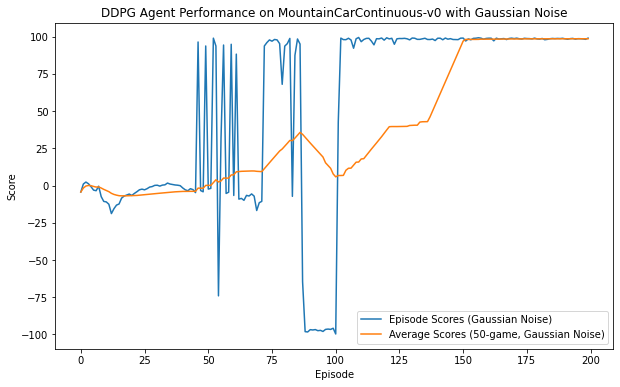

In [104]:
plt.figure(figsize=(10, 6))
plt.plot(scores_gauss_mc, label='Episode Scores (Gaussian Noise)')
plt.plot(avg_scores_gauss_mc, label='Average Scores (50-game, Gaussian Noise)')
plt.xlabel('Episode')
plt.ylabel('Score')
plt.title('DDPG Agent Performance on MountainCarContinuous-v0 with Gaussian Noise')
plt.legend()
plt.show()

### Comparison Plot(mountain car)

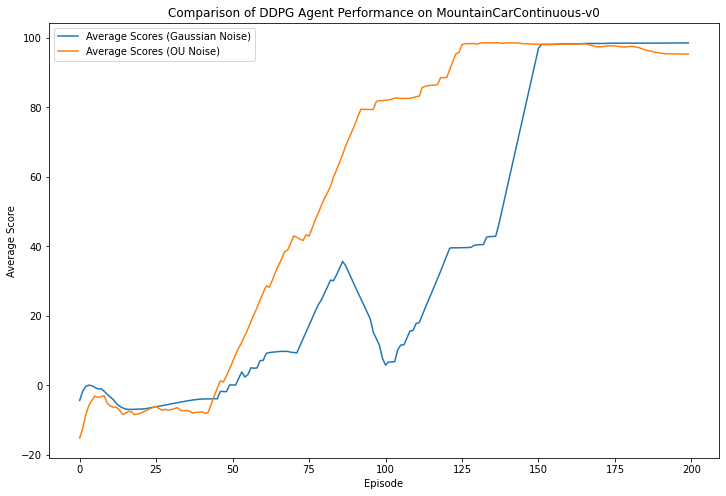

In [105]:
plt.figure(figsize=(12, 8))
plt.plot(avg_scores_gauss_mc, label='Average Scores (Gaussian Noise)')
plt.plot(avg_scores_ou_mc, label='Average Scores (OU Noise)')
plt.xlabel('Episode')
plt.ylabel('Average Score')
plt.title('Comparison of DDPG Agent Performance on MountainCarContinuous-v0')
plt.legend()
plt.show()

## b) Lunar Lander with Gaussian Noise V/S OU Noise

In [10]:
env = gym.make("LunarLanderContinuous-v2", render_mode="rgb_array")
print("Now Training the Lunar Lander with Gaussian Noise ..................... \n")
n_actions=env.action_space.shape[0]
state_dim=env.observation_space.shape
print(f"n_actions = {n_actions}")
print(f"state_dim = {state_dim}")
agent = DDPG_agent(state_dim=state_dim, tau=0.001, n_actions=n_actions, max_mem_size=1000000,
                    fc1_dims=400, fc2_dims=300, batch_size=64, gamma=0.99, actor_lr=0.001,
                    critic_lr=0.002,ouaction_noise=False) 

np.random.seed(0)
n_episodes = 500
scores_gauss_ll = []
avg_scores_gauss_ll = []
for episode in range(n_episodes):
    done = False
    score = 0
    state, _ = env.reset()
    n_steps = 0
#     agent.noise.reset()
    while not done:
        action = agent.select_action(state)
        new_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        reward += int(done) * done_reward     # when done
        agent.store_experience(state, action, reward, new_state, terminated, truncated)
        agent.update()
        score += reward
        n_steps += 1
        
        if n_steps > 100:
            done = True
        state = new_state

    scores_gauss_ll.append(score)
    avg_score = np.mean(scores_gauss_ll[-50:])
    avg_scores_gauss_ll.append(avg_score)
    print('Episode:', episode, ', score %.1f:' % score,
            ', 50-game average score %.1f:' % avg_score)


Now Training the Lunar Lander with Gaussian Noise ..................... 

n_actions = 2
state_dim = (8,)
Episode: 0 , score -167.8: , 50-game average score -167.8:
Episode: 1 , score -394.8: , 50-game average score -281.3:
Episode: 2 , score -758.2: , 50-game average score -440.3:
Episode: 3 , score -523.7: , 50-game average score -461.1:
Episode: 4 , score -633.7: , 50-game average score -495.6:
Episode: 5 , score -203.4: , 50-game average score -446.9:
Episode: 6 , score -79.2: , 50-game average score -394.4:
Episode: 7 , score -185.0: , 50-game average score -368.2:
Episode: 8 , score -82.7: , 50-game average score -336.5:
Episode: 9 , score -313.4: , 50-game average score -334.2:
Episode: 10 , score -70.3: , 50-game average score -310.2:
Episode: 11 , score -117.8: , 50-game average score -294.2:
Episode: 12 , score -42.5: , 50-game average score -274.8:
Episode: 13 , score -216.3: , 50-game average score -270.6:
Episode: 14 , score 0.8: , 50-game average score -252.5:
Episode: 15 

Episode: 137 , score -242.3: , 50-game average score -73.4:
Episode: 138 , score 115.5: , 50-game average score -69.9:
Episode: 139 , score -79.1: , 50-game average score -69.9:
Episode: 140 , score -49.1: , 50-game average score -68.3:
Episode: 141 , score -71.2: , 50-game average score -67.1:
Episode: 142 , score -228.0: , 50-game average score -72.0:
Episode: 143 , score -59.8: , 50-game average score -71.6:
Episode: 144 , score -43.7: , 50-game average score -72.2:
Episode: 145 , score -120.0: , 50-game average score -72.2:
Episode: 146 , score -25.9: , 50-game average score -72.9:
Episode: 147 , score -14.7: , 50-game average score -71.9:
Episode: 148 , score -121.8: , 50-game average score -73.9:
Episode: 149 , score -207.3: , 50-game average score -74.8:
Episode: 150 , score -115.1: , 50-game average score -76.9:
Episode: 151 , score -59.8: , 50-game average score -77.2:
Episode: 152 , score -60.3: , 50-game average score -77.8:
Episode: 153 , score -83.1: , 50-game average scor

Episode: 275 , score -72.8: , 50-game average score -105.7:
Episode: 276 , score -22.8: , 50-game average score -104.2:
Episode: 277 , score -45.5: , 50-game average score -104.2:
Episode: 278 , score -58.4: , 50-game average score -105.2:
Episode: 279 , score -7.2: , 50-game average score -103.5:
Episode: 280 , score -62.1: , 50-game average score -102.4:
Episode: 281 , score -59.0: , 50-game average score -101.9:
Episode: 282 , score 14.8: , 50-game average score -100.1:
Episode: 283 , score -59.6: , 50-game average score -100.0:
Episode: 284 , score -45.7: , 50-game average score -100.2:
Episode: 285 , score 0.4: , 50-game average score -94.5:
Episode: 286 , score -78.1: , 50-game average score -93.7:
Episode: 287 , score -55.2: , 50-game average score -93.4:
Episode: 288 , score -115.6: , 50-game average score -90.7:
Episode: 289 , score -4.4: , 50-game average score -90.4:
Episode: 290 , score -42.5: , 50-game average score -89.9:
Episode: 291 , score -1.3: , 50-game average score

Episode: 414 , score 67.6: , 50-game average score -64.1:
Episode: 415 , score -9.7: , 50-game average score -63.5:
Episode: 416 , score -25.8: , 50-game average score -62.6:
Episode: 417 , score -1.3: , 50-game average score -59.6:
Episode: 418 , score -64.6: , 50-game average score -58.5:
Episode: 419 , score -47.7: , 50-game average score -58.3:
Episode: 420 , score -24.5: , 50-game average score -58.9:
Episode: 421 , score -39.5: , 50-game average score -59.4:
Episode: 422 , score -53.6: , 50-game average score -59.5:
Episode: 423 , score -91.5: , 50-game average score -61.1:
Episode: 424 , score -57.3: , 50-game average score -60.7:
Episode: 425 , score -78.3: , 50-game average score -60.9:
Episode: 426 , score -53.7: , 50-game average score -61.3:
Episode: 427 , score -174.1: , 50-game average score -64.3:
Episode: 428 , score 91.8: , 50-game average score -60.5:
Episode: 429 , score -207.5: , 50-game average score -62.0:
Episode: 430 , score -72.4: , 50-game average score -62.4:

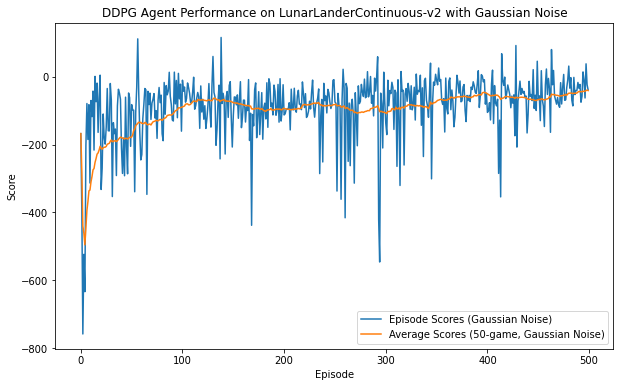

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(scores_gauss_ll, label='Episode Scores (Gaussian Noise)')
plt.plot(avg_scores_gauss_ll, label='Average Scores (50-game, Gaussian Noise)')
plt.xlabel('Episode')
plt.ylabel('Score')
plt.title('DDPG Agent Performance on LunarLanderContinuous-v2 with Gaussian Noise')
plt.legend()
plt.show()

### Comparison Plot(lunar lander)

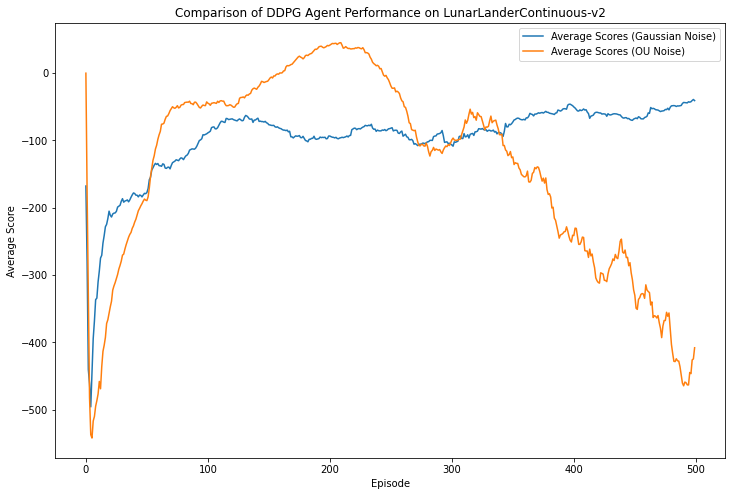

In [13]:
plt.figure(figsize=(12, 8))
plt.plot(avg_scores_gauss_ll, label='Average Scores (Gaussian Noise)')
plt.plot(avg_scores_ou_ll, label='Average Scores (OU Noise)')
plt.xlabel('Episode')
plt.ylabel('Average Score')
plt.title('Comparison of DDPG Agent Performance on LunarLanderContinuous-v2')
plt.legend()
plt.show()

### Q1(c) The standard DDPG implementation involves using Ornstein Ulhenbeck (OU) noise for exploration. For this sub question study the implication of using Gaussian noise for exploration and report (with reasons) if solving the task takes similar number of episodes
#### Ans: 
As can be seen from the comparison plots on the 2 environments, the choice between Gaussian and OU noise for exploration in DDPG depends on the specific requirements of the task or environment in hand.

   - **Mountain-car**: 
       - The case of OU noise performs considerably better than Gaussian noise, which takes a larger number of steps to achieve a similar reward to that of OU noise.
       - The OU noise introduces temporal correlations, which might be beneficial for the Mountain Car task as it involves building momentum and overcoming gravitational forces. 
       - Remebering some amount of the previous actions(since OU noise has some memory) will be benificial in this case as it would better know how much to push and in which direction etc.
       
   - **Lunar Lander**:
       - There is not much difference in the performance of OU noise or the Gaussian Noise, at earlier stages it seems the gaussian is performing better, then OU overtakes then both settles around the same point.
       - OU noise might introduce unnecessary temporal correlations that will not add any value to the precise and continuous control required in the Lunar Lander task.
       -  In the Lunar Lander task, memory might not be helpful because landing on the moon is all about precise, independent adjustments.
       - Also, OU noise is known for its ability to provide smooth and continuous exploration. however In Lunar Lander, where the spacecraft faces changing conditions during descent, exploration that can quickly adapt to new challenges might be preferred.


# Question 2

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
class MultiArmBanditEnv:
    def __init__(self, n_arms, best_and_second_best_close=False):
        self.n_arms = n_arms
        self.best_and_second_best_close = best_and_second_best_close
        self.reset()
        
    def get_pulled_arm_reward(self, arm_index):
        if arm_index < 0 or arm_index >= self.n_arms:
            raise ValueError("Arm index is invalid")
        
        arm_mean = self.means[arm_index]
        arm_var = self.var[arm_index]
        
        return np.random.normal(arm_mean, arm_var)
    
    def reset(self):
        if self.best_and_second_best_close == False:
            self.means = np.sort(np.random.random(self.n_arms)) * 10
        else:
            temp = np.sort(np.random.random(self.n_arms - 1)) * 10
            self.means = np.append(temp, temp[self.n_arms - 2] + np.random.uniform(0, 0.2))  
        
        self.var = [1 for i in range(self.n_arms)]

        
        

In [3]:
def greedy(Q_values_array):
    possible_max_indices = np.where(Q_values_array == np.max(Q_values_array))[0]
    action = np.random.choice(possible_max_indices)
    
    return action
    
def epsilon_greedy(Q_values_array, epsilon):
    if np.random.rand() < epsilon:                      # Explore
        return np.random.choice(len(Q_values_array))
    
    else:                                               # Exploit
        return greedy(Q_values_array)
    

def epsilon_greedy_with_decay(Q_values_array, epsilon, decay_fraction):
    if np.random.rand() < epsilon:                       # Explore      
        epsilon = epsilon * decay_fraction
        return epsilon, decay_fraction, np.random.choice(len(Q_values_array))    
    else:                                                 # Exploit
        epsilon = epsilon * decay_fraction
        return epsilon, decay_fraction, greedy(Q_values_array)
    
    
def ucb1(Q_values_array, visit_freq_array, t):  
    exploration_part_array = np.sqrt(2* np.log(t + 1) / (np.array(visit_freq_array) + 1e-6))

    return np.argmax(Q_values_array + exploration_part_array)
    
    

In [4]:
def bandit_algorithm(env, algorithm, num_rounds, exploration_time, is_decay=False, *args):
    """
    Run a bandit algorithm for a specified number of rounds.

    """
    n_arms = env.n_arms
    Q_values = np.zeros(n_arms)  # Estimated values of each arm
    arm_counts = np.zeros(n_arms)  # Number of times each arm has been chosen
    rewards = []
    regret = []
    regret_sum = 0
    chosen_arms = []

    # Exploration phase
    for t in range(exploration_time):
        for arm in range(n_arms):
            r = env.get_pulled_arm_reward(arm)
            rewards.append(r)
            arm_counts[arm] += 1
            Q_values[arm] = ((Q_values[arm] * (arm_counts[arm] - 1)) + r) / arm_counts[arm]
            regret_sum += np.max(env.means) - r
            regret.append(regret_sum)

    # Exploitation phase
    for t in range(num_rounds - (exploration_time * n_arms)):
        if exploration_time == 1:                                    # UCB1
            arm = algorithm(Q_values, arm_counts, t)
        
        else:                            
            if is_decay == True:                                    # If to decay to epsilon 
                *args, arm = algorithm(Q_values, *args)
            else:    
                arm = algorithm(Q_values, *args)
                
        r = env.get_pulled_arm_reward(arm)
        rewards.append(r)
        arm_counts[arm] += 1
        Q_values[arm] = ((Q_values[arm] * (arm_counts[arm] - 1)) + r) / arm_counts[arm]

        regret_sum += np.max(env.means) - r
        regret.append(regret_sum)
        chosen_arms.append(arm)

    return rewards, arm_counts, regret, chosen_arms


In [5]:
n_rounds = 1000
n_runs = 50
exploration_time = 5
n_arms = 10
bandit_env = MultiArmBanditEnv(n_arms)

# Greedy
greedy_avg_rewards = np.zeros((n_runs, n_rounds))
greedy_avg_regret = np.zeros((n_runs, n_rounds))
greedy_avg_arm_counts = np.zeros((n_runs, n_arms))
for run in range(n_runs):
    bandit_env.reset()
    rewards, arm_counts, regret, chosen_arms = bandit_algorithm(bandit_env, greedy, n_rounds, exploration_time)
    greedy_avg_rewards[run] = rewards
    greedy_avg_regret[run] = regret
    greedy_avg_arm_counts[run] = arm_counts
    
# Epsilon-greedy with epsilon = 0.1
epsilon_greedy_01_avg_rewards = np.zeros((n_runs, n_rounds))
epsilon_greedy_01_avg_regret = np.zeros((n_runs, n_rounds))
epsilon_greedy_01_avg_arm_counts = np.zeros((n_runs, n_arms))
for run in range(n_runs):
    bandit_env.reset()
    rewards, arm_counts, regret, chosen_arms = bandit_algorithm(bandit_env, epsilon_greedy, n_rounds, exploration_time, False, 0.1)
    epsilon_greedy_01_avg_rewards[run] = rewards
    epsilon_greedy_01_avg_regret[run] = regret
    epsilon_greedy_01_avg_arm_counts[run] = arm_counts
    
    
# Epsilon-greedy with epsilon = 0.01
epsilon_greedy_02_avg_rewards = np.zeros((n_runs, n_rounds))
epsilon_greedy_02_avg_regret = np.zeros((n_runs, n_rounds))
epsilon_greedy_02_avg_arm_counts = np.zeros((n_runs, n_arms))
for run in range(n_runs):
    bandit_env.reset()
    rewards, arm_counts, regret, chosen_arms = bandit_algorithm(bandit_env, epsilon_greedy, n_rounds, exploration_time, False, 0.01)
    epsilon_greedy_02_avg_rewards[run] = rewards
    epsilon_greedy_02_avg_regret[run] = regret
    epsilon_greedy_02_avg_arm_counts[run] = arm_counts

    
# Epsilon-decay with epsilon = 1 and decay rate = 0.9
epsilon_decay_avg_rewards = np.zeros((n_runs, n_rounds))
epsilon_decay_avg_regret = np.zeros((n_runs, n_rounds))
epsilon_decay_avg_arm_counts = np.zeros((n_runs, n_arms))
for run in range(n_runs):
    bandit_env.reset()
    rewards, arm_counts, regret, chosen_arms = bandit_algorithm(bandit_env, epsilon_greedy_with_decay, n_rounds, exploration_time, True, 1.0, 0.99)
    epsilon_decay_avg_rewards[run] = rewards
    epsilon_decay_avg_regret[run] = regret
    epsilon_decay_avg_arm_counts[run] = arm_counts
    

# UCB
ucb_avg_rewards = np.zeros((n_runs, n_rounds))
ucb_avg_regret = np.zeros((n_runs, n_rounds))
ucb_avg_arm_counts = np.zeros((n_runs, n_arms))
for run in range(n_runs):
    bandit_env.reset()
    rewards, arm_counts, regret, chosen_arms = bandit_algorithm(bandit_env, ucb1, n_rounds, 1, False, 1.0)
    ucb_avg_rewards[run] = rewards
    ucb_avg_regret[run] = regret
    ucb_avg_arm_counts[run] = arm_counts


## Q2(c)  For the case of K = 10 and number of rounds N = 1000, plot the average reward obtained using each of the above strategies (in same graph)

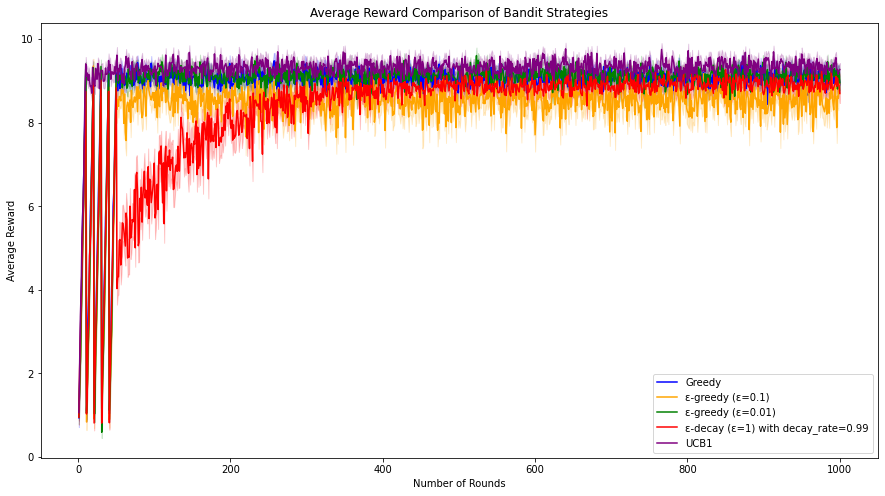

In [6]:
def plot_average_rewards(avg_rewards, label, color):
    avg_rewards_mean = np.mean(avg_rewards, axis=0)
    avg_rewards_std = np.std(avg_rewards, axis=0) / np.sqrt(n_runs)
    plt.plot(range(1, n_rounds + 1), avg_rewards_mean, label=label, color=color)
    plt.fill_between(
        range(1, n_rounds + 1),
        avg_rewards_mean - avg_rewards_std,
        avg_rewards_mean + avg_rewards_std,
        alpha=0.2,
        color=color,
    )

plt.figure(figsize=(15, 8))

# Greedy
plot_average_rewards(greedy_avg_rewards, 'Greedy', 'blue')

# Epsilon-greedy 
plot_average_rewards(epsilon_greedy_01_avg_rewards, 'ε-greedy (ε=0.1)', 'orange')

plot_average_rewards(epsilon_greedy_02_avg_rewards, 'ε-greedy (ε=0.01)', 'green')

plot_average_rewards(epsilon_decay_avg_rewards, 'ε-decay (ε=1) with decay_rate=0.99', 'red')

# UCB
plot_average_rewards(ucb_avg_rewards, 'UCB1', 'purple')

plt.xlabel('Number of Rounds')
plt.ylabel('Average Reward')
plt.title('Average Reward Comparison of Bandit Strategies')
plt.legend()
plt.show()


## Q2(d)  Plot a histogram consisting of average number of times each of the 10 arms is pulled for each of the algorithm

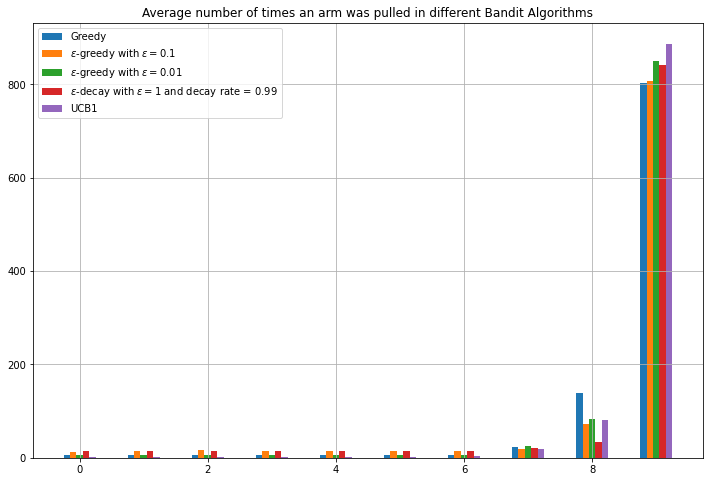

In [7]:
c_greedy = [np.mean(s) for s in np.array(greedy_avg_arm_counts).T]
c_eps_greedy1 = [np.mean(s) for s in np.array(epsilon_greedy_01_avg_arm_counts).T]
c_eps_greedy_2 = [np.mean(s) for s in np.array(epsilon_greedy_02_avg_arm_counts).T]
c_eps_decay = [np.mean(s) for s in np.array(epsilon_decay_avg_arm_counts).T]
c_ucb = [np.mean(s) for s in np.array(ucb_avg_arm_counts).T]

x = [i for i in range(n_arms)]
barwidth = 0.1
x1 = [i - 2 * barwidth for i in x]
x2 = [i - barwidth for i in x]
x3 = [i for i in x]
x4 = [i + barwidth for i in x]
x5 = [i + 2 * barwidth for i in x]


plt.figure(figsize=(12, 8))
plt.bar(x1, c_greedy, width=barwidth, label="Greedy")
plt.bar(x2, c_eps_greedy1, width=barwidth, label="$\\epsilon$-greedy with $\\epsilon = 0.1$")
plt.bar(x3, c_eps_greedy_2, width=barwidth, label="$\\epsilon$-greedy with $\\epsilon = 0.01$")
plt.bar(x4, c_eps_decay, width=barwidth, label="$\\epsilon$-decay with $\\epsilon = 1$ and decay rate = 0.99")
plt.bar(x5, c_ucb, width=barwidth, label="UCB1")
plt.legend()
plt.grid()
plt.title("Average number of times an arm was pulled in different Bandit Algorithms")
plt.show()


## Q2(e) Plot the average regret as a function of time for each algorithm

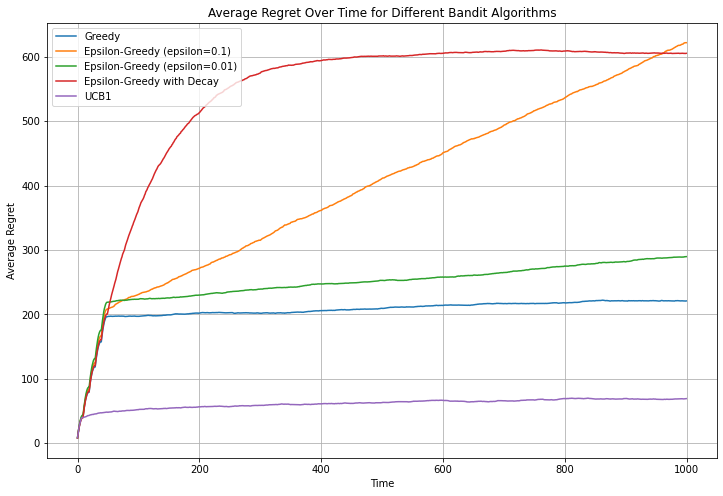

In [8]:
avg_regret_greedy = np.mean(greedy_avg_regret, axis=0)
avg_regret_epsilon_01 = np.mean(epsilon_greedy_01_avg_regret, axis=0)
avg_regret_epsilon_02 = np.mean(epsilon_greedy_02_avg_regret, axis=0)
avg_regret_epsilon_decay = np.mean(epsilon_decay_avg_regret, axis=0)
avg_regret_ucb = np.mean(ucb_avg_regret, axis=0)

plt.figure(figsize=(12, 8))
plt.plot(avg_regret_greedy, label='Greedy')
plt.plot(avg_regret_epsilon_01, label='Epsilon-Greedy (epsilon=0.1)')
plt.plot(avg_regret_epsilon_02, label='Epsilon-Greedy (epsilon=0.01)')
plt.plot(avg_regret_epsilon_decay, label='Epsilon-Greedy with Decay')
plt.plot(avg_regret_ucb, label='UCB1')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Average Regret')
plt.title('Average Regret Over Time for Different Bandit Algorithms')
plt.grid(True)
plt.show()


## Q2(f) From the above plots, reason out which of the above bandit algorithm is better

UCB1 is significantly better than the other algorithms based on the average regret plots(less regret), ability to distinghuish between the best arm and other arms(from the histogram plot) and the higher rewards(reward plots). Reasons can be stated as :- 

#### Balanced Exploration and Exploitation: 
   - It explores arms with higher uncertainty by using its upper confidence bound term, so  arms with uncertain rewards are tried often
   - It exploits arms with higher estimated mean rewards, making use of what it knows already
   
#### Reduced Risk of getting stuck in Suboptimal Arms:
   - By exploring uncertain arms, UCB1 reduces the risk of getting stuck onto suboptimal arms and promotes useful exploration
   
#### Effective exploitation of Certain arms:
   - If an arm's estimated reward is more certain, then it exploits it more, thus providing consistently high rewards over time.
 
 
    - Thus, compared to other algorithms, the UCB1's strategic exploration improves efficiency and gives robustness.
    - All in all, the epsilon strategies do NOT incorporate the uncertainties while exploring while in UCB1, it is incorpor-ated in the upper confidence bound calculation. 
    - Hence, We will not lose our trials to arms of whom we are certain about their average mean reward.

## Q2(g) Repeat the above analysis for the scenario when the mean rewards of the second best arm and the best arm are close

In [9]:
n_rounds = 1000
n_runs = 50
exploration_time = 5
n_arms = 10
bandit_env = MultiArmBanditEnv(n_arms, True)

# Greedy
greedy_avg_rewards = np.zeros((n_runs, n_rounds))
greedy_avg_regret = np.zeros((n_runs, n_rounds))
greedy_avg_arm_counts = np.zeros((n_runs, n_arms))
for run in range(n_runs):
    bandit_env.reset()
    rewards, arm_counts, regret, chosen_arms = bandit_algorithm(
        bandit_env, greedy, n_rounds, exploration_time
    )
    greedy_avg_rewards[run] = rewards
    greedy_avg_regret[run] = regret
    greedy_avg_arm_counts[run] = arm_counts
    
# Epsilon-greedy with epsilon = 0.1
epsilon_greedy_01_avg_rewards = np.zeros((n_runs, n_rounds))
epsilon_greedy_01_avg_regret = np.zeros((n_runs, n_rounds))
epsilon_greedy_01_avg_arm_counts = np.zeros((n_runs, n_arms))
for run in range(n_runs):
    bandit_env.reset()
    rewards, arm_counts, regret, chosen_arms = bandit_algorithm(
        bandit_env, epsilon_greedy, n_rounds, exploration_time, False, 0.1
    )
    epsilon_greedy_01_avg_rewards[run] = rewards
    epsilon_greedy_01_avg_regret[run] = regret
    epsilon_greedy_01_avg_arm_counts[run] = arm_counts
    
    
# Epsilon-greedy with epsilon = 0.01
epsilon_greedy_02_avg_rewards = np.zeros((n_runs, n_rounds))
epsilon_greedy_02_avg_regret = np.zeros((n_runs, n_rounds))
epsilon_greedy_02_avg_arm_counts = np.zeros((n_runs, n_arms))
for run in range(n_runs):
    bandit_env.reset()
    rewards, arm_counts, regret, chosen_arms = bandit_algorithm(
        bandit_env, epsilon_greedy, n_rounds, exploration_time, False, 0.01
    )
    epsilon_greedy_02_avg_rewards[run] = rewards
    epsilon_greedy_02_avg_regret[run] = regret
    epsilon_greedy_02_avg_arm_counts[run] = arm_counts

    
# Epsilon-decay with epsilon = 1 and decay rate = 0.9
epsilon_decay_avg_rewards = np.zeros((n_runs, n_rounds))
epsilon_decay_avg_regret = np.zeros((n_runs, n_rounds))
epsilon_decay_avg_arm_counts = np.zeros((n_runs, n_arms))
for run in range(n_runs):
    bandit_env.reset()
    rewards, arm_counts, regret, chosen_arms = bandit_algorithm(
        bandit_env, epsilon_greedy_with_decay, n_rounds, exploration_time, True, 1.0, 0.99
    )
    epsilon_decay_avg_rewards[run] = rewards
    epsilon_decay_avg_regret[run] = regret
    epsilon_decay_avg_arm_counts[run] = arm_counts
    

# UCB
ucb_avg_rewards = np.zeros((n_runs, n_rounds))
ucb_avg_regret = np.zeros((n_runs, n_rounds))
ucb_avg_arm_counts = np.zeros((n_runs, n_arms))
for run in range(n_runs):
    bandit_env.reset()
    rewards, arm_counts, regret, chosen_arms = bandit_algorithm(
        bandit_env, ucb1, n_rounds, 1, False, 1.0
    )
    ucb_avg_rewards[run] = rewards
    ucb_avg_regret[run] = regret
    ucb_avg_arm_counts[run] = arm_counts

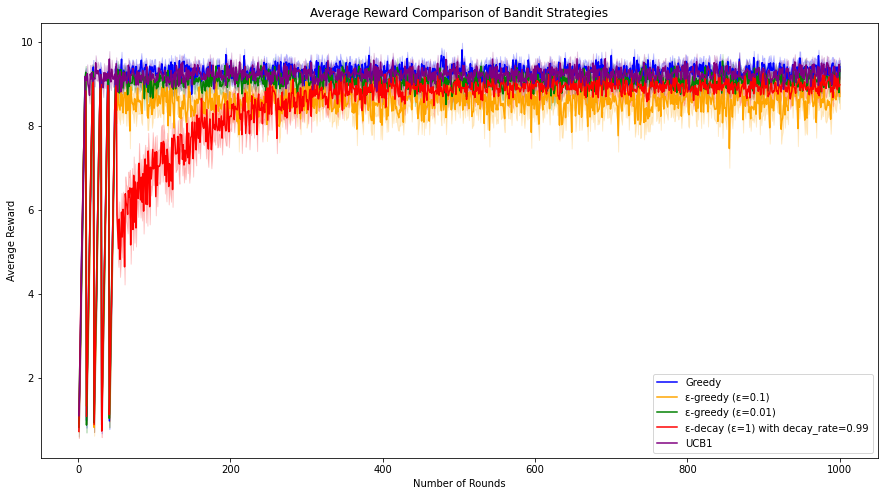

In [10]:
def plot_average_rewards(avg_rewards, label, color):
    avg_rewards_mean = np.mean(avg_rewards, axis=0)
    avg_rewards_std = np.std(avg_rewards, axis=0) / np.sqrt(n_runs)
    plt.plot(range(1, n_rounds + 1), avg_rewards_mean, label=label, color=color)
    plt.fill_between(
        range(1, n_rounds + 1),
        avg_rewards_mean - avg_rewards_std,
        avg_rewards_mean + avg_rewards_std,
        alpha=0.2,
        color=color,
    )

plt.figure(figsize=(15, 8))

# Greedy
plot_average_rewards(greedy_avg_rewards, 'Greedy', 'blue')

# Epsilon-greedy 
plot_average_rewards(epsilon_greedy_01_avg_rewards, 'ε-greedy (ε=0.1)', 'orange')

plot_average_rewards(epsilon_greedy_02_avg_rewards, 'ε-greedy (ε=0.01)', 'green')

plot_average_rewards(epsilon_decay_avg_rewards, 'ε-decay (ε=1) with decay_rate=0.99', 'red')

# UCB
plot_average_rewards(ucb_avg_rewards, 'UCB1', 'purple')

plt.xlabel('Number of Rounds')
plt.ylabel('Average Reward')
plt.title('Average Reward Comparison of Bandit Strategies')
plt.legend()
plt.show()


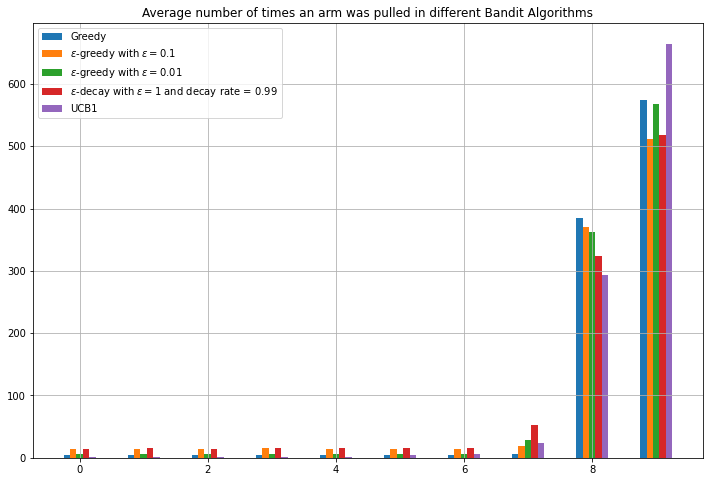

In [11]:
c_greedy = [np.mean(s) for s in np.array(greedy_avg_arm_counts).T]
c_eps_greedy1 = [np.mean(s) for s in np.array(epsilon_greedy_01_avg_arm_counts).T]
c_eps_greedy_2 = [np.mean(s) for s in np.array(epsilon_greedy_02_avg_arm_counts).T]
c_eps_decay = [np.mean(s) for s in np.array(epsilon_decay_avg_arm_counts).T]
c_ucb = [np.mean(s) for s in np.array(ucb_avg_arm_counts).T]

x = [i for i in range(n_arms)]
barwidth = 0.1
x1 = [i - 2 * barwidth for i in x]
x2 = [i - barwidth for i in x]
x3 = [i for i in x]
x4 = [i + barwidth for i in x]
x5 = [i + 2 * barwidth for i in x]


plt.figure(figsize=(12, 8))
plt.bar(x1, c_greedy, width=barwidth, label="Greedy")
plt.bar(x2, c_eps_greedy1, width=barwidth, label="$\\epsilon$-greedy with $\\epsilon = 0.1$")
plt.bar(x3, c_eps_greedy_2, width=barwidth, label="$\\epsilon$-greedy with $\\epsilon = 0.01$")
plt.bar(x4, c_eps_decay, width=barwidth, label="$\\epsilon$-decay with $\\epsilon = 1$ and decay rate = 0.99")
plt.bar(x5, c_ucb, width=barwidth, label="UCB1")
plt.legend()
plt.grid()
plt.title("Average number of times an arm was pulled in different Bandit Algorithms")
plt.show()


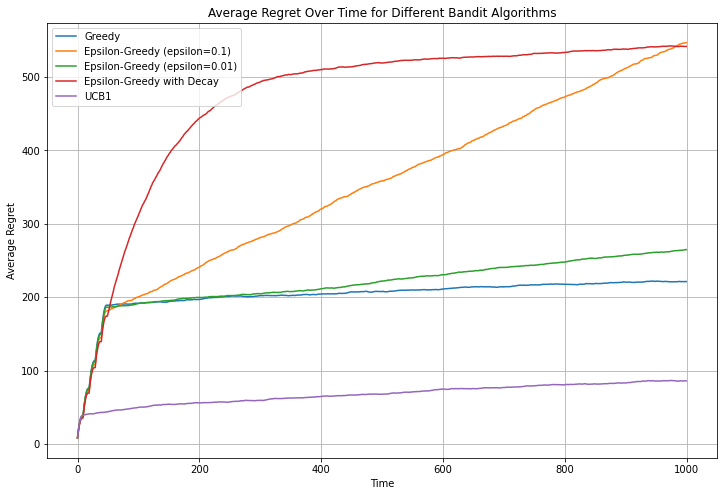

In [12]:
avg_regret_greedy = np.mean(greedy_avg_regret, axis=0)
avg_regret_epsilon_01 = np.mean(epsilon_greedy_01_avg_regret, axis=0)
avg_regret_epsilon_02 = np.mean(epsilon_greedy_02_avg_regret, axis=0)
avg_regret_epsilon_decay = np.mean(epsilon_decay_avg_regret, axis=0)
avg_regret_ucb = np.mean(ucb_avg_regret, axis=0)

plt.figure(figsize=(12, 8))
plt.plot(avg_regret_greedy, label='Greedy')
plt.plot(avg_regret_epsilon_01, label='Epsilon-Greedy (epsilon=0.1)')
plt.plot(avg_regret_epsilon_02, label='Epsilon-Greedy (epsilon=0.01)')
plt.plot(avg_regret_epsilon_decay, label='Epsilon-Greedy with Decay')
plt.plot(avg_regret_ucb, label='UCB1')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Average Regret')
plt.title('Average Regret Over Time for Different Bandit Algorithms')
plt.grid(True)
plt.show()
